In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import tqdm
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
df_contg = pd.read_csv("./df_results_date/contg_df.csv", sep=";", index_col="NAME")
df_contg = df_contg.dropna()
df_contg['DATE'] = pd.to_datetime(df_contg['DATE'], format='%Y-%m-%d %H:%M:%S')
df_contg

/tmp/ipykernel_6218/4052476871.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_contg = pd.read_csv("./df_results_date/contg_df.csv", sep=";", index_col="NAME")


,MIN_VOLT,MAX_VOLT,MAX_FLOW,N_ITER,AFFECTED_ELEM,CONSTR_GEN_Q,CONSTR_GEN_U,CONSTR_VOLT,CONSTR_FLOW,RES_NODE,COEF_REPORT,TAP_CHANGERS,PREDICTED_SCORE,STATUS,REAL_SCORE,DATE
NAME,,,,,,,,,,,,,,,,
AYRESL71GAUDI,10.571766,16.055405,29.548321,17,13,32.973172,0,10.833333,0.0,0,33,13,5239.5489815246365,HDS,100000.0,2023-01-01 01:00:00
MANDAL71PEUP5,64.279244,22.954712,136.685913,24,20,21.745718,0,10.833333,0.0,0,16,10,5646.337425829498,HDS,100000.0,2023-01-01 01:00:00
GRANZL72JUMEA,162.779603,84.326710,385.753281,21,28,159.902486,0,26.666667,0.0,0,31,41,5854.664607441995,BOTH,18100.0,2023-01-01 01:00:00
TAMARL72TAVEL,0.000000,6.108440,11.188617,19,26,190.893741,0,5.000000,0.0,0,3,31,6440.220570080886,BOTH,12920.0,2023-01-01 01:00:00
CATG4L74VIGY,12.706810,1883.681408,338.376548,22,19,104.008849,0,54.166667,0.0,0,12,88,7179.506097928988,BOTH,12700.0,2023-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ALBERL71G.ILE,62.903247,0.000000,158.396167,15,23,5.012824,0,0.000000,0.0,0,4,20,6839.533313,BOTH,3690.0,2023-02-21 01:00:00
ALBERL72BATHI,0.000000,0.000000,1.013995,11,17,4.006150,0,0.000000,0.0,0,0,20,3826.920519,BOTH,3690.0,2023-02-21 01:00:00
ALBERL72G.ILE,0.000000,0.000000,6.518280,15,23,5.012822,0,0.000000,0.0,0,4,20,4414.888628,BOTH,3690.0,2023-02-21 01:00:00


In [3]:
count = df_contg["STATUS"].value_counts()
total = len(df_contg.index)

print("Converge only in Hades: " + str(count["HDS"]), count["HDS"]/total * 100)
print("Converge only in Dynawo: " + str(count["DWO"]), count["DWO"]/total * 100)
print("Converge in both: " + str(count["BOTH"]), count["BOTH"]/total * 100)
print("Diverge in both: " + str(count["NONE"]), count["NONE"]/total * 100)

Converge only in Hades: 23531 3.788259310060597
Converge only in Dynawo: 983 0.15825332122687377
Converge in both: 596540 96.03706637302064
Diverge in both: 102 0.016420995691903483


In [4]:
# Worst contingencies
df_contg = df_contg.sort_values(by="REAL_SCORE", ascending=False)
df_contg.head()

#df_contg = df_contg.sort_values(by="REAL_SCORE", ascending=False)

,MIN_VOLT,MAX_VOLT,MAX_FLOW,N_ITER,AFFECTED_ELEM,CONSTR_GEN_Q,CONSTR_GEN_U,CONSTR_VOLT,CONSTR_FLOW,RES_NODE,COEF_REPORT,TAP_CHANGERS,PREDICTED_SCORE,STATUS,REAL_SCORE,DATE
NAME,,,,,,,,,,,,,,,,
AYRESL71GAUDI,10.571766,16.055405,29.548321,17,13,32.973172,0,10.833333,0.0,0,33,13,5239.5489815246365,HDS,100000.0,2023-01-01 01:00:00
TAVELL71TRI.P,1.002884,0.000000,0.000000,12,31,15.307845,0,0.000000,0.0,0,4,0,5345.939958033463,HDS,100000.0,2023-02-02 04:00:00
ROUGEL71TILL5,5.964722,0.000000,9.123996,15,31,18.957958,0,14.166667,0.0,0,18,21,5647.42806798624,HDS,100000.0,2023-02-02 04:00:00
LOGELL71MUHLB,53.540474,9.534515,155.678326,15,16,17.570542,0,0.000000,0.0,0,25,5,5181.175743898366,HDS,100000.0,2023-02-02 04:00:00
ROUGEL71TOURB,0.000000,0.000000,0.000000,15,20,17.959590,0,14.166667,0.0,0,11,0,4925.371096815426,HDS,100000.0,2023-02-02 04:00:00


In [5]:
import statistics
df_filtered = df_contg[df_contg["REAL_SCORE"] < 50000]

dict_cont = {}
    
list_index = list(df_filtered.index)

for i in range(len(list_index)):
    row_i = df_filtered.iloc[i]
    index_i = list_index[i]
    if index_i[0] == ".":
        if index_i not in dict_cont:
            dict_cont[index_i] = [row_i["REAL_SCORE"]]
        else:
            dict_cont[index_i].append(row_i["REAL_SCORE"])

for i in list(dict_cont.keys()):
    dict_cont[i] = statistics.median(dict_cont[i])


dict_cont = dict(sorted(dict_cont.items(), key=lambda item: item[1], reverse=True))

j = 1
for i in list(dict_cont.items())[:100]:
    print(j, ":", i[0], "-", i[1])
    j+=1

1 : .HERNL71ARGIA - 5910.0
2 : .RODPL72ALBER - 5390.0
3 : .RODPL71ALBER - 5390.0
4 : .VENAL71VLARO - 4970.0
5 : .VICHL71BAIXA - 4790.0
6 : .AVELL72AVELI - 4410.0
7 : .ENSDL72VIGY - 4360.0
8 : .ACHEL71LONNY - 4350.0
9 : .ROMAL71B.TOL - 4310.0
10 : .ENSDL71VIGY - 4310.0
11 : .EICHL71MUHLB - 4260.0
12 : .VERBL71B.TOL - 4250.0
13 : .LAUFL71SIERE - 4080.0
14 : .AVELL71MASTA - 4080.0
15 : .BASSL71SIERE - 4070.0
16 : .ASPHL71SIERE - 4045.0
17 : .BASSL71MAMBE - 4040.0


In [5]:
from datetime import datetime
import statistics
df_filtered = df_contg[df_contg["REAL_SCORE"] < 50000]

'''
day_list = []
for i in range(len(df_filtered.index)):
    row_i = df_filtered.iloc[i]

    day_list.append(datetime.strptime(str(row_i["DATE"]), '%Y-%m-%d %H:%M:%S').weekday())

df_filtered["W_DAY"] = day_list

df_list = []

for i in range(7):
    df_list.append(df_filtered.groupby(df_filtered["W_DAY"] == i).get_group(True))
'''


day_list = []
for i in range(len(df_filtered.index)):
    row_i = df_filtered.iloc[i]

    day_list.append(datetime.strptime(str(row_i["DATE"]), '%Y-%m-%d %H:%M:%S').weekday())

df_filtered["W_DAY"] = day_list

df_list = []

df_list.append(df_filtered.groupby(df_filtered["W_DAY"] < 5).get_group(True))
df_list.append(df_filtered.groupby(df_filtered["W_DAY"] == 5).get_group(True))
df_list.append(df_filtered.groupby(df_filtered["W_DAY"] == 6).get_group(True))


'''
month_list = []
for i in range(len(df_filtered.index)):
    row_i = df_filtered.iloc[i]

    month_list.append(datetime.strptime(str(row_i["DATE"]), '%Y-%m-%d %H:%M:%S').month)

df_filtered["MONTH"] = month_list

df_list = []

for i in [1,2,6]:
    df_list.append(df_filtered.groupby(df_filtered["MONTH"] == i).get_group(True))
'''

'''
hour_list = []
for i in range(len(df_filtered.index)):
    row_i = df_filtered.iloc[i]
    hour_list.append(datetime.strptime(str(row_i["DATE"]), '%Y-%m-%d %H:%M:%S').hour)

df_filtered["HOUR"] = hour_list

df_list = []

for i in range(24):
    df_list.append(df_filtered.groupby(df_filtered["HOUR"] == i).get_group(True))
'''

'''
hour_list = []
for i in range(len(df_filtered.index)):
    row_i = df_filtered.iloc[i]
    hour_list.append(datetime.strptime(str(row_i["DATE"]), '%Y-%m-%d %H:%M:%S').hour)

df_filtered["HOUR"] = hour_list

df_list = []


df_list.append(df_filtered.groupby(((df_filtered["HOUR"] < 8) | (df_filtered["HOUR"] >= 20))).get_group(True))
df_list.append(df_filtered.groupby(((df_filtered["HOUR"] >= 8) | (df_filtered["HOUR"] < 20))).get_group(True))
'''


'''
for df_i in df_list:
    print()
    print()
    print()
    dict_cont = {}
    
    list_index = list(df_i.index)
    
    for i in range(len(df_i.index)):
        row_i = df_i.iloc[i]
        index_i = list_index[i]
        if index_i not in dict_cont:
            dict_cont[index_i] = [1, row_i["REAL_SCORE"]]
        else:
            dict_cont[index_i][0] = dict_cont[index_i][0] + 1
            dict_cont[index_i][1] = dict_cont[index_i][1] + row_i["REAL_SCORE"]
    
    for i in list(dict_cont.keys()):
        dict_cont[i] = dict_cont[i][1] / dict_cont[i][0]
    
    
    dict_cont = dict(sorted(dict_cont.items(), key=lambda item: item[1], reverse=True))
    
    print(list(dict_cont.items())[:50])
'''

list_dicts = []
for df_i in df_list:
    print()
    print()
    print()
    dict_cont = {}
    
    list_index = list(df_i.index)
    
    for i in range(len(df_i.index)):
        row_i = df_i.iloc[i]
        index_i = list_index[i]
        if index_i not in dict_cont:
            dict_cont[index_i] = [row_i["REAL_SCORE"]]
        else:
            dict_cont[index_i].append(row_i["REAL_SCORE"])
    
    for i in list(dict_cont.keys()):
        dict_cont[i] = statistics.median(dict_cont[i])
    
    
    dict_cont = dict(sorted(dict_cont.items(), key=lambda item: item[1], reverse=True))
    
    print(list(dict_cont.items())[:14])
    list_dicts.append(list(dict_cont.keys())[:14])

print()
print()
print()
print()
print()
print()


for i in range(len(list_dicts)):
    print()
    print(i)
    print()
    if i == 0:
        for pos_i in list_dicts[i]:
            if pos_i not in list_dicts[i + 1]:
                if pos_i not in list_dicts[(len(list_dicts) - 1)]:
                    print("-+", pos_i)
                else:
                    print("- ", pos_i)
            elif pos_i not in list_dicts[(len(list_dicts) - 1)]:
                print(" +", pos_i)
            else:
                print("  ", pos_i)
    elif i == (len(list_dicts) - 1):
        for pos_i in list_dicts[i]:
            if pos_i not in list_dicts[0]:
                if pos_i not in list_dicts[i - 1]:
                    print("-+", pos_i)
                else:
                    print("- ", pos_i)
            elif pos_i not in list_dicts[i - 1]:
                print(" +", pos_i)
            else:
                print("  ", pos_i)
    else:
        for pos_i in list_dicts[i]:
            if pos_i not in list_dicts[i + 1]:
                if pos_i not in list_dicts[i - 1]:
                    print("-+", pos_i)
                else:
                    print("- ", pos_i)
            elif pos_i not in list_dicts[i - 1]:
                print(" +", pos_i)
            else:
                print("  ", pos_i)
                

/tmp/ipykernel_9458/2128935211.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["W_DAY"] = day_list





[('DONZAL72GOLF5', 6790.0), ('CIVAUL71VALDI', 6640.0), ('FLAMAL72MENUE', 6440.0), ('P.CORL72SSAL7', 6110.0), ('BLAYAL72BRAUD', 6090.0), ('BVIL7L71GAUGL', 5930.0), ('BOCTOL71N.SE1', 5890.0), ('P.CORL71SSAL7', 5870.0), ('BLAYAL74BRAUD', 5810.0), ('BLAYAL73BRAUD', 5800.0), ('COULAL73CRUA5', 5780.0), ('COULAL72CRUA5', 5760.0), ('BARNAL74PALUE', 5730.0), ('BARNAL72PALUE', 5730.0)]



[('DONZAL72GOLF5', 7430.0), ('CIVAUL71VALDI', 7190.0), ('FLAMAL72MENUE', 6895.0), ('P.CORL72SSAL7', 6750.0), ('BLAYAL72BRAUD', 6540.0), ('BVIL7L71GAUGL', 6480.0), ('BOCTOL71N.SE1', 6335.0), ('.HERNL71ARGIA', 6330.0), ('CATG4L74VIGY', 6320.0), ('BLAYAL73BRAUD', 6260.0), ('BARNAL72PALUE', 6255.0), ('SSEA2L71VERGE', 6180.0), ('REALTL72TAVEL', 6160.0), ('BVILXL72GAUGL', 6140.0)]



[('CIVAUL71VALDI', 8040.0), ('DONZAL72GOLF5', 7990.0), ('P.CORL72SSAL7', 7305.0), ('BLAYAL74BRAUD', 7270.0), ('BLAYAL72BRAUD', 6990.0), ('FLAMAL72MENUE', 6970.0), ('CATG4L74VIGY', 6940.0), ('BVIL7L71GAUGL', 6935.0), ('BOCTOL71N.SE1', 

In [6]:
from datetime import datetime
import statistics
df_filtered = df_contg[df_contg["REAL_SCORE"] < 50000]

'''
day_list = []
for i in range(len(df_filtered.index)):
    row_i = df_filtered.iloc[i]

    day_list.append(datetime.strptime(str(row_i["DATE"]), '%Y-%m-%d %H:%M:%S').weekday())

df_filtered["W_DAY"] = day_list

df_list = []

for i in range(7):
    df_list.append(df_filtered.groupby(df_filtered["W_DAY"] == i).get_group(True))
'''

'''
month_list = []
for i in range(len(df_filtered.index)):
    row_i = df_filtered.iloc[i]

    month_list.append(datetime.strptime(str(row_i["DATE"]), '%Y-%m-%d %H:%M:%S').month)

df_filtered["MONTH"] = month_list

df_list = []

for i in [1,2,6]:
    df_list.append(df_filtered.groupby(df_filtered["MONTH"] == i).get_group(True))
'''

'''
hour_list = []
for i in range(len(df_filtered.index)):
    row_i = df_filtered.iloc[i]
    hour_list.append(datetime.strptime(str(row_i["DATE"]), '%Y-%m-%d %H:%M:%S').hour)

df_filtered["HOUR"] = hour_list


df_list = []

for i in range(24):
    df_list.append(df_filtered.groupby(df_filtered["HOUR"] == i).get_group(True))

print(df_list)
'''

df_list = [df_filtered]
for df_i in df_list:
    print()
    print()
    print()
    dict_cont = {}
    
    list_index = list(df_i.index)
    
    for i in range(len(df_i.index)):
        row_i = df_i.iloc[i]
        index_i = list_index[i]
        if index_i not in dict_cont:
            dict_cont[index_i] = [1, row_i["REAL_SCORE"]]
        else:
            dict_cont[index_i][0] = dict_cont[index_i][0] + 1
            dict_cont[index_i][1] = dict_cont[index_i][1] + row_i["REAL_SCORE"]
    
    for i in list(dict_cont.keys()):
        dict_cont[i] = dict_cont[i][1] / dict_cont[i][0]
    
    
    dict_cont = dict(sorted(dict_cont.items(), key=lambda item: item[1], reverse=True))
    
    print(list(dict_cont.items())[:14])
'''

for df_i in df_list:
    print()
    print()
    print()
    dict_cont = {}
    
    list_index = list(df_i.index)
    
    for i in range(len(df_i.index)):
        row_i = df_i.iloc[i]
        index_i = list_index[i]
        if index_i not in dict_cont:
            dict_cont[index_i] = [row_i["REAL_SCORE"]]
        else:
            dict_cont[index_i].append(row_i["REAL_SCORE"])
    
    for i in list(dict_cont.keys()):
        dict_cont[i] = statistics.median(dict_cont[i])
    
    
    dict_cont = dict(sorted(dict_cont.items(), key=lambda item: item[1], reverse=True))
    
    print(list(dict_cont.items())[:50])
'''




[('CIVAUL71VALDI', 7782.443243243243), ('DONZAL72GOLF5', 7703.976693372178), ('FLAMAL72MENUE', 7456.845588235294), ('BLAYAL72BRAUD', 7304.016212232867), ('P.CORL72SSAL7', 7265.354273192111), ('BVIL7L71GAUGL', 7183.456698741673), ('BOCTOL71N.SE1', 7098.289000718907), ('BLAYAL73BRAUD', 6968.612975391499), ('BLAYAL74BRAUD', 6925.765004226542), ('SSEA2L71VERGE', 6882.005730659026), ('CHIN2L72G.AVO', 6792.171387073347), ('BARNAL72PALUE', 6711.577424023155), ('AVOI5L72G.AVO', 6699.329488103821), ('CATG4L74VIGY', 6684.3019943019945)]


'\n\nfor df_i in df_list:\n    print()\n    print()\n    print()\n    dict_cont = {}\n    \n    list_index = list(df_i.index)\n    \n    for i in range(len(df_i.index)):\n        row_i = df_i.iloc[i]\n        index_i = list_index[i]\n        if index_i not in dict_cont:\n            dict_cont[index_i] = [row_i["REAL_SCORE"]]\n        else:\n            dict_cont[index_i].append(row_i["REAL_SCORE"])\n    \n    for i in list(dict_cont.keys()):\n        dict_cont[i] = statistics.median(dict_cont[i])\n    \n    \n    dict_cont = dict(sorted(dict_cont.items(), key=lambda item: item[1], reverse=True))\n    \n    print(list(dict_cont.items())[:50])\n'

In [7]:
for i in range(0, 100, 5):
    print(df_contg["REAL_SCORE"].quantile(i/100))

1860.0
3360.0
3640.0
3830.0
4000.0
4140.0
4290.0
4420.0
4550.0
4690.0
4840.0
5000.0
5180.0
5390.0
5640.0
5970.0
6460.0
7320.0
8870.0
14840.0


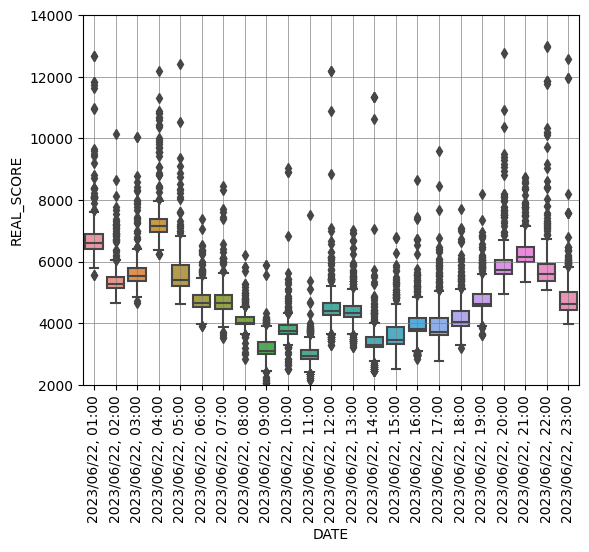

In [8]:
df_contg = df_contg.sort_values(by="DATE", ascending=True)

mask = (df_contg["DATE"] > datetime.strptime("2023-06-22 00:00:00", '%Y-%m-%d %H:%M:%S')) & (df_contg["DATE"] <= datetime.strptime("2023-06-22 23:59:59", '%Y-%m-%d %H:%M:%S'))

df_filtered = df_contg.loc[mask]

df_filtered = df_filtered[df_filtered["REAL_SCORE"] < 50000]

# Creating dataset
ax = plt.axes()
ax.set_facecolor("white")
sns.boxplot(x=df_filtered['DATE'].dt.strftime("%Y/%m/%d, %H:%M"), y=df_filtered["REAL_SCORE"]).set(
            xlabel='DATE', 
            ylabel='REAL_SCORE')

plt.xticks(rotation=90)
plt.ylim(2000, 14000)
plt.grid(color='grey', linewidth=0.5)
plt.savefig("fig_1.pdf", format="pdf", bbox_inches="tight")

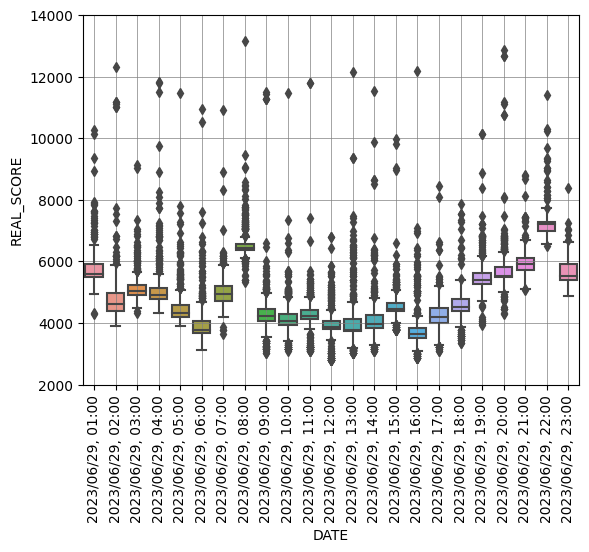

In [9]:
df_contg = df_contg.sort_values(by="DATE", ascending=True)

mask = (df_contg["DATE"] > datetime.strptime("2023-06-29 00:00:00", '%Y-%m-%d %H:%M:%S')) & (df_contg["DATE"] <= datetime.strptime("2023-06-29 23:59:59", '%Y-%m-%d %H:%M:%S'))

df_filtered = df_contg.loc[mask]

df_filtered = df_filtered[df_filtered["REAL_SCORE"] < 50000]

# Creating dataset
ax = plt.axes()
ax.set_facecolor("white")
sns.boxplot(x=df_filtered['DATE'].dt.strftime("%Y/%m/%d, %H:%M"), y=df_filtered["REAL_SCORE"]).set(
            xlabel='DATE', 
            ylabel='REAL_SCORE')
plt.xticks(rotation=90)
plt.ylim(2000, 14000)
plt.grid(color='grey', linewidth=0.5)
plt.savefig("fig_2.pdf", format="pdf", bbox_inches="tight")

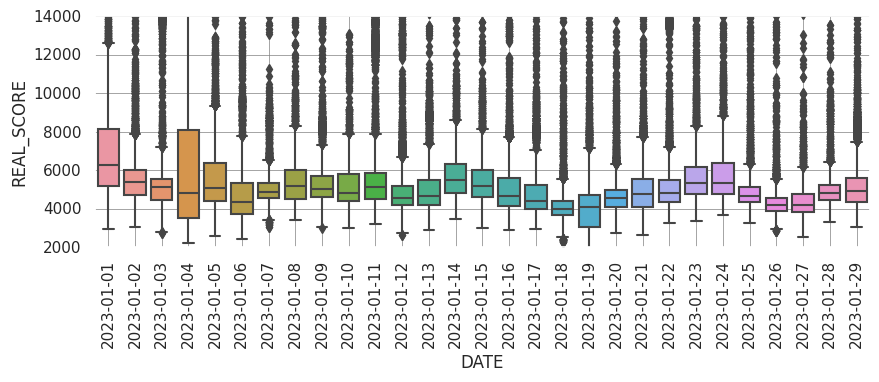

In [10]:
df_contg = df_contg.sort_values(by="DATE", ascending=True)

mask = (df_contg["DATE"] > datetime.strptime("2023-01-01 00:00:00", '%Y-%m-%d %H:%M:%S')) & (df_contg["DATE"] <= datetime.strptime("2023-01-31 23:59:59", '%Y-%m-%d %H:%M:%S'))

df_filtered = df_contg.loc[mask]

df_filtered = df_filtered[df_filtered["REAL_SCORE"] < 50000]

df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'], format='%Y-%m-%d %H:%M:%S').dt.date

# Creating dataset
sns.set(rc={"figure.figsize":(10, 3)})
ax = plt.axes()
ax.set_facecolor("white")
sns.boxplot(x=df_filtered["DATE"], y=df_filtered["REAL_SCORE"]).set(
            xlabel='DATE', 
            ylabel='REAL_SCORE')
plt.xticks(rotation=90)
plt.ylim(2000, 14000)
plt.grid(color='grey', linewidth=0.5)
plt.savefig("fig_3.pdf", format="pdf", bbox_inches="tight")


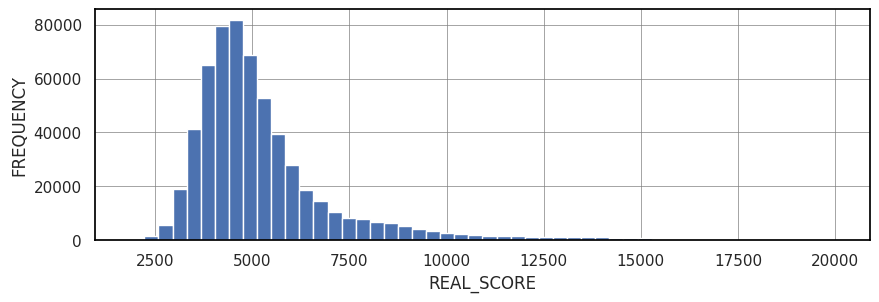

In [11]:
# Extract the column you want to create a histogram for
column_name = 'REAL_SCORE'

df_filtered = df_contg

df_filtered = df_filtered[df_filtered[column_name] < 20000]

column_data = df_filtered[column_name]

# Create the histogram using matplotlib
ax = plt.axes()
ax.set_facecolor("white")
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
plt.hist(column_data, bins=50)  # Adjust the number of bins as per your preference

# Customize the plot (optional)
plt.xlabel(column_name)
plt.ylabel('FREQUENCY')

# Display the histogram
plt.grid(color='grey', linewidth=0.5)
plt.savefig("fig_4.pdf", format="pdf", bbox_inches="tight")

In [12]:
model = pickle.load(open("Models/GBR_model.pkl", "rb"))
contg_scores = []
df_filtered = df_contg.reset_index()

for i in tqdm.tqdm(df_filtered.index):
    contg_scores.append(model.predict(df_filtered.loc[[i]].drop(["NAME", "DATE", "STATUS", "REAL_SCORE", "PREDICTED_SCORE"], axis=1))[0])

df_contg["PREDICTED_SCORE"] = contg_scores
df_contg

/home/guiu/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DummyRegressor from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/guiu/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/guiu/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator GradientBoostingRegressor from version 1.3.2 when using version 1.3.

,MIN_VOLT,MAX_VOLT,MAX_FLOW,N_ITER,AFFECTED_ELEM,CONSTR_GEN_Q,CONSTR_GEN_U,CONSTR_VOLT,CONSTR_FLOW,RES_NODE,COEF_REPORT,TAP_CHANGERS,PREDICTED_SCORE,STATUS,REAL_SCORE,DATE
NAME,,,,,,,,,,,,,,,,
AYRESL71GAUDI,10.571766,16.055405,29.548321,17,13,32.973172,0,10.833333,0.0,0,33,13,5946.438720,HDS,100000.0,2023-01-01 01:00:00
CHAINL71VERGE,0.000000,1.566620,1.156059,14,13,25.742498,0,21.666667,0.0,0,184,0,6186.547567,BOTH,6040.0,2023-01-01 01:00:00
CHAN5L72QUINT,0.000000,0.000000,2.779706,15,14,29.211528,0,21.666667,0.0,0,7,0,6308.267385,BOTH,6320.0,2023-01-01 01:00:00
CUBNEL72MQIS,0.000000,0.000000,18.711428,13,17,29.757531,0,21.666667,0.0,0,9,0,6448.640833,BOTH,6320.0,2023-01-01 01:00:00
AVOI5L73CHINX,28.923050,101.474841,77.464327,24,15,57.066713,0,0.000000,0.0,0,18,42,8136.428438,BOTH,8840.0,2023-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BARNAL72REMIS,24.822936,23.486076,60.754415,16,21,8.053474,0,0.000000,0.0,0,11,40,4479.358944,BOTH,4760.0,2023-06-30 23:00:00
HAVR5L73ROUGE,52.556736,0.000000,87.395275,14,17,6.086965,0,0.000000,0.0,0,148,40,4825.275410,BOTH,4480.0,2023-06-30 23:00:00
CHEVAL71WARAN,0.000000,0.000000,2.535530,11,24,11.653225,0,0.000000,0.0,0,22,40,4739.395474,BOTH,4660.0,2023-06-30 23:00:00


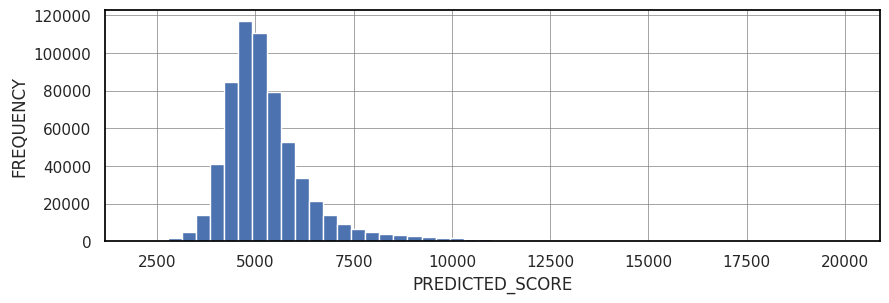

In [13]:
def convertable_to_float(string):
    try:
        result = float(string)
        return result
    except ValueError:
        return 100000

# Extract the column you want to create a histogram for
column_name = 'PREDICTED_SCORE'

df_filtered = df_contg

df_filtered[column_name] = df_filtered[column_name].apply(convertable_to_float)

df_filtered = df_filtered[df_filtered[column_name] < 20000]

column_data = df_filtered[column_name]

# Create the histogram using matplotlib
ax = plt.axes()
ax.set_facecolor("white")
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

plt.hist(column_data, bins=50)  # Adjust the number of bins as per your preference
# Customize the plot (optional)
plt.xlabel(column_name)
plt.ylabel('FREQUENCY')

# Display the histogram
plt.grid(color='grey', linewidth=0.5)
plt.savefig("fig_5.pdf", format="pdf", bbox_inches="tight")

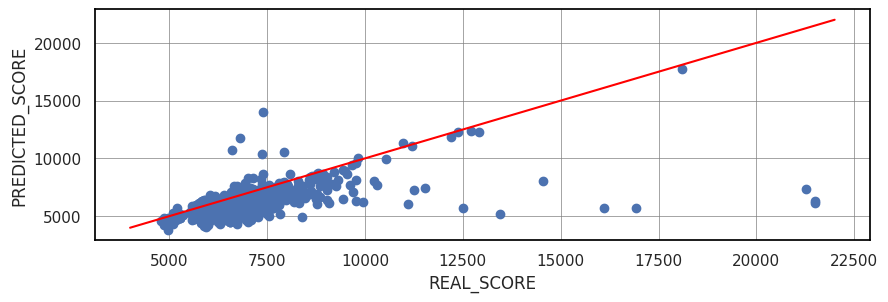

In [14]:
df_filtered = df_contg[df_contg['REAL_SCORE'] < 50000] 
df_filtered = df_filtered[df_filtered['PREDICTED_SCORE'] < 50000].head(1000)
# Extract the variables for the scatter plot
x = df_filtered['REAL_SCORE']
y = df_filtered['PREDICTED_SCORE']

# Create the scatter plot
ax = plt.axes()
ax.set_facecolor("white")
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
plt.scatter(x, y)

# Customize the plot (optional)
plt.xlabel('REAL_SCORE')
plt.ylabel('PREDICTED_SCORE')

# Display the scatter plot
plt.plot([4000, 22000], [4000, 22000], color="red")
plt.grid(color='grey', linewidth=0.5)
plt.savefig("fig_6.pdf", format="pdf", bbox_inches="tight")

In [15]:
model = pickle.load(open("Models/LR_model_Mean.pkl", "rb"))
contg_scores = []
df_filtered = df_contg.reset_index()

for i in tqdm.tqdm(df_filtered.index):
    contg_scores.append(model.predict(df_filtered.loc[[i]].drop(["NAME", "DATE", "STATUS", "REAL_SCORE", "PREDICTED_SCORE"], axis=1))[0])

df_contg["PREDICTED_SCORE"] = contg_scores
df_contg

/home/guiu/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
100%|█████████████████████████████████| 621156/621156 [09:41<00:00, 1068.67it/s]


,MIN_VOLT,MAX_VOLT,MAX_FLOW,N_ITER,AFFECTED_ELEM,CONSTR_GEN_Q,CONSTR_GEN_U,CONSTR_VOLT,CONSTR_FLOW,RES_NODE,COEF_REPORT,TAP_CHANGERS,PREDICTED_SCORE,STATUS,REAL_SCORE,DATE
NAME,,,,,,,,,,,,,,,,
AYRESL71GAUDI,10.571766,16.055405,29.548321,17,13,32.973172,0,10.833333,0.0,0,33,13,5475.955242,HDS,100000.0,2023-01-01 01:00:00
CHAINL71VERGE,0.000000,1.566620,1.156059,14,13,25.742498,0,21.666667,0.0,0,184,0,5144.571497,BOTH,6040.0,2023-01-01 01:00:00
CHAN5L72QUINT,0.000000,0.000000,2.779706,15,14,29.211528,0,21.666667,0.0,0,7,0,5266.795729,BOTH,6320.0,2023-01-01 01:00:00
CUBNEL72MQIS,0.000000,0.000000,18.711428,13,17,29.757531,0,21.666667,0.0,0,9,0,5161.666152,BOTH,6320.0,2023-01-01 01:00:00
AVOI5L73CHINX,28.923050,101.474841,77.464327,24,15,57.066713,0,0.000000,0.0,0,18,42,6328.410206,BOTH,8840.0,2023-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BARNAL72REMIS,24.822936,23.486076,60.754415,16,21,8.053474,0,0.000000,0.0,0,11,40,5556.265049,BOTH,4760.0,2023-06-30 23:00:00
HAVR5L73ROUGE,52.556736,0.000000,87.395275,14,17,6.086965,0,0.000000,0.0,0,148,40,5357.202644,BOTH,4480.0,2023-06-30 23:00:00
CHEVAL71WARAN,0.000000,0.000000,2.535530,11,24,11.653225,0,0.000000,0.0,0,22,40,5166.416509,BOTH,4660.0,2023-06-30 23:00:00


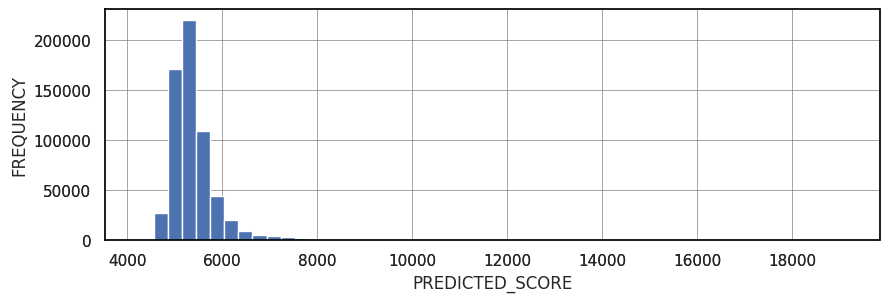

In [16]:
def convertable_to_float(string):
    try:
        result = float(string)
        return result
    except ValueError:
        return 100000

# Extract the column you want to create a histogram for
column_name = 'PREDICTED_SCORE'

df_filtered = df_contg

df_filtered[column_name] = df_filtered[column_name].apply(convertable_to_float)

df_filtered = df_filtered[df_filtered[column_name] < 20000]

column_data = df_filtered[column_name]

# Create the histogram using matplotlib
ax = plt.axes()
ax.set_facecolor("white")
plt.hist(column_data, bins=50)  # Adjust the number of bins as per your preference


# Create the histogram using matplotlib
ax = plt.axes()
ax.set_facecolor("white")
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

plt.hist(column_data, bins=50)  # Adjust the number of bins as per your preference
# Customize the plot (optional)
plt.xlabel(column_name)
plt.ylabel('FREQUENCY')

# Display the histogram
plt.grid(color='grey', linewidth=0.5)
plt.savefig("fig_7.pdf", format="pdf", bbox_inches="tight")

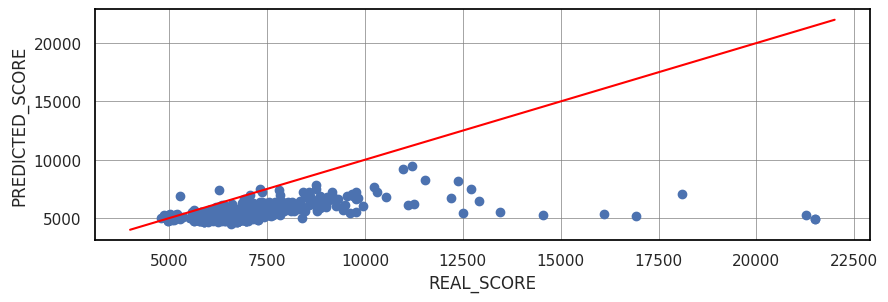

In [17]:
df_filtered = df_contg[df_contg['REAL_SCORE'] < 50000] 
df_filtered = df_filtered[df_filtered['PREDICTED_SCORE'] < 50000].head(1000)
# Extract the variables for the scatter plot
x = df_filtered['REAL_SCORE']
y = df_filtered['PREDICTED_SCORE']

# Create the scatter plot
ax = plt.axes()
ax.set_facecolor("white")
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
plt.scatter(x, y)

# Customize the plot (optional)
plt.xlabel('REAL_SCORE')
plt.ylabel('PREDICTED_SCORE')

# Display the scatter plot
plt.plot([4000, 22000], [4000, 22000], color="red")
plt.grid(color='grey', linewidth=0.5)
plt.savefig("fig_8.pdf", format="pdf", bbox_inches="tight")

In [18]:
model = pickle.load(open("Models/LR_model_Median.pkl", "rb"))
contg_scores = []
df_filtered = df_contg.reset_index()

for i in tqdm.tqdm(df_filtered.index):
    contg_scores.append(model.predict(df_filtered.loc[[i]].drop(["NAME", "DATE", "STATUS", "REAL_SCORE", "PREDICTED_SCORE"], axis=1))[0])

df_contg["PREDICTED_SCORE"] = contg_scores
df_contg

/home/guiu/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator TheilSenRegressor from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
100%|██████████████████████████████████| 621156/621156 [10:55<00:00, 948.13it/s]


,MIN_VOLT,MAX_VOLT,MAX_FLOW,N_ITER,AFFECTED_ELEM,CONSTR_GEN_Q,CONSTR_GEN_U,CONSTR_VOLT,CONSTR_FLOW,RES_NODE,COEF_REPORT,TAP_CHANGERS,PREDICTED_SCORE,STATUS,REAL_SCORE,DATE
NAME,,,,,,,,,,,,,,,,
AYRESL71GAUDI,10.571766,16.055405,29.548321,17,13,32.973172,0,10.833333,0.0,0,33,13,5704.442998,HDS,100000.0,2023-01-01 01:00:00
CHAINL71VERGE,0.000000,1.566620,1.156059,14,13,25.742498,0,21.666667,0.0,0,184,0,5514.103997,BOTH,6040.0,2023-01-01 01:00:00
CHAN5L72QUINT,0.000000,0.000000,2.779706,15,14,29.211528,0,21.666667,0.0,0,7,0,5621.328093,BOTH,6320.0,2023-01-01 01:00:00
CUBNEL72MQIS,0.000000,0.000000,18.711428,13,17,29.757531,0,21.666667,0.0,0,9,0,5627.691337,BOTH,6320.0,2023-01-01 01:00:00
AVOI5L73CHINX,28.923050,101.474841,77.464327,24,15,57.066713,0,0.000000,0.0,0,18,42,6752.510979,BOTH,8840.0,2023-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BARNAL72REMIS,24.822936,23.486076,60.754415,16,21,8.053474,0,0.000000,0.0,0,11,40,4675.070214,BOTH,4760.0,2023-06-30 23:00:00
HAVR5L73ROUGE,52.556736,0.000000,87.395275,14,17,6.086965,0,0.000000,0.0,0,148,40,4714.916533,BOTH,4480.0,2023-06-30 23:00:00
CHEVAL71WARAN,0.000000,0.000000,2.535530,11,24,11.653225,0,0.000000,0.0,0,22,40,4659.600220,BOTH,4660.0,2023-06-30 23:00:00


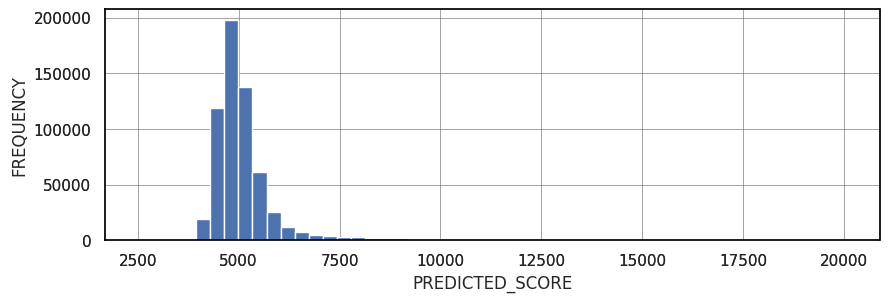

In [19]:
def convertable_to_float(string):
    try:
        result = float(string)
        return result
    except ValueError:
        return 100000

# Extract the column you want to create a histogram for
column_name = 'PREDICTED_SCORE'

df_filtered = df_contg

df_filtered[column_name] = df_filtered[column_name].apply(convertable_to_float)

df_filtered = df_filtered[df_filtered[column_name] < 20000]

column_data = df_filtered[column_name]

# Create the histogram using matplotlib
ax = plt.axes()
ax.set_facecolor("white")
plt.hist(column_data, bins=50)  # Adjust the number of bins as per your preference


# Create the histogram using matplotlib
ax = plt.axes()
ax.set_facecolor("white")
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

plt.hist(column_data, bins=50)  # Adjust the number of bins as per your preference
# Customize the plot (optional)
plt.xlabel(column_name)
plt.ylabel('FREQUENCY')

# Display the histogram
plt.grid(color='grey', linewidth=0.5)
plt.savefig("fig_7.pdf", format="pdf", bbox_inches="tight")

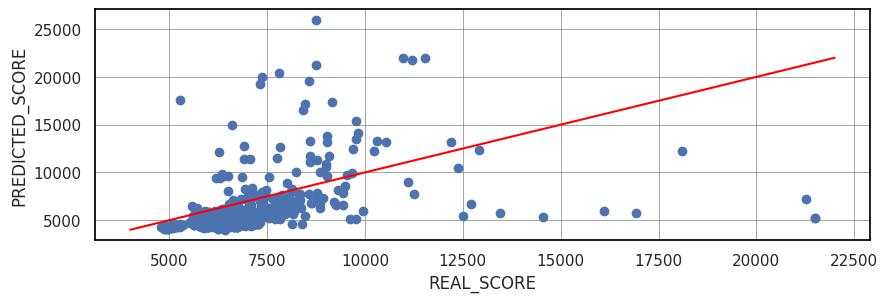

In [20]:
df_filtered = df_contg[df_contg['REAL_SCORE'] < 50000] 
df_filtered = df_filtered[df_filtered['PREDICTED_SCORE'] < 50000].head(1000)
# Extract the variables for the scatter plot
x = df_filtered['REAL_SCORE']
y = df_filtered['PREDICTED_SCORE']

# Create the scatter plot
ax = plt.axes()
ax.set_facecolor("white")
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
plt.scatter(x, y)

# Customize the plot (optional)
plt.xlabel('REAL_SCORE')
plt.ylabel('PREDICTED_SCORE')

# Display the scatter plot
plt.plot([4000, 22000], [4000, 22000], color="red")
plt.grid(color='grey', linewidth=0.5)
plt.savefig("fig_8.pdf", format="pdf", bbox_inches="tight")